# 1. Set up Environment

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

# %matplotlib inline

# 2. Import File and Visualize

In [2]:
file="C:/Users/freta/Desktop/ultimate_challenge/logins.json"

logins_data = pd.read_json(file)

In [3]:
# chech the first 5 observation to check for the data
logins_data.head()      
#  We only have one column

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#  chech the last 5 observation to check for the data

logins_data.tail()



,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
logins_data.info()
#  We have 93142 observations and one column which is datetime64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# Q1. Aggregate these login counts based on 15minute time intervals

In [6]:
# Set the column as index

logins_data.set_index('login_time', inplace=True)



In [61]:
# Check its type, just to make sure that it is datetime index
type(logins_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
# set frequency column for each row which serves as a count for each column
# And then sort it since the index is not sorted

logins_data['frequency']=1
logins_data.sort_index(inplace=True)

In [8]:
# Now we can aggregate the frequency based on 15 minute time intervals

logins_agg = logins_data.resample("15min").sum()
logins_agg.head()

,frequency
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
# To make sure that we did everything in the right way let's sum the frequency and it should be equal to the 
# total number of observations(93142)

logins_agg.frequency.sum()

93142

# Q2. visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand

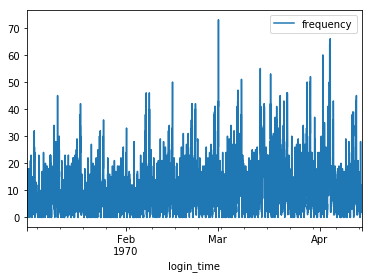

In [15]:
# create a plot fot the whole time period

logins_agg.plot()
plt.show()

# We can see some spikes at certain interval. However, it is difficult to get something out og this plot. 
# Hence, we need to visualize in different way as well as more specifically so that we can detect the trend easly.

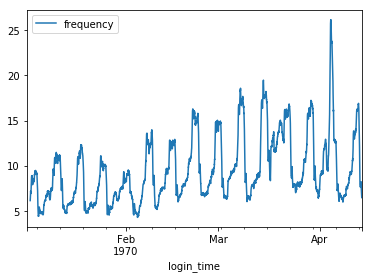

In [68]:
#  plot a rolling daily average. Here our window is 96 which a window for 24 hours(96*15)

logins_agg.rolling(window=96).mean().plot()
 
# - We can clearly see the rise and fall of the demand on certain interval. 
# - To know that certain interval lets plot in a weekly basis
# - There is also a gradual rise in demand from january to april.Specifically the is highest demand in april as indicated 
# by the long spike
# - Unlike the other monhs there is only a data for about 15 days for the month of april.

# Moving Average of Demand for January

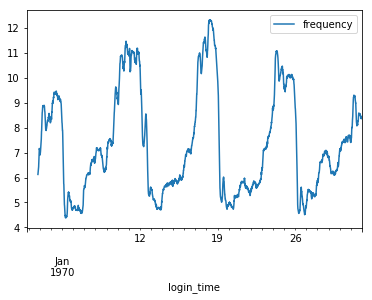

In [69]:
# To be more specific, let's visualize the rolling mean for a single month; in this case for January.

logins_agg.loc['1970-01'].rolling(96).mean().plot()

# 3&4, 10 & 11, 17 & 18, 24 & 25 are the days with raise in demand.

In [80]:
# let's check the week day for a specific day in january so that we can detect at which day the demand is rising

datetime.datetime(1970, 1, 17).weekday()

# Here we can see that January 17 is saturday, and 18 will defnitely be sunday. Therefore, all the the days that
# shows rise in demand are suturdays and sundays.

5

### Plot Weekend only

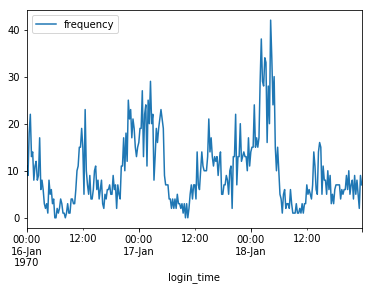

In [81]:
# Once we realized that the rises are during weekends, let's be more specific once again and check the weekends only.

logins_agg.loc["1970-1-16":"1970-1-18"].plot()

#  Wow! the graph clearly depicted that the rises occurs at midnight and around noon during the weekends

### Plot for Weekdays only

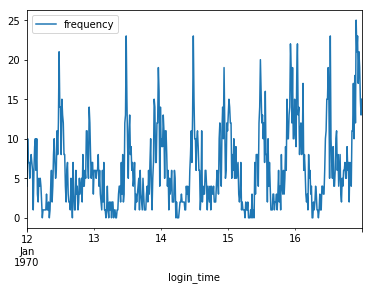

In [73]:
# Just for the sake of comparison let's check the weekdays only

logins_agg.loc['1970-01-12' : '1970-01-16'].plot()

# Here, we can see rise and fall in demand. 

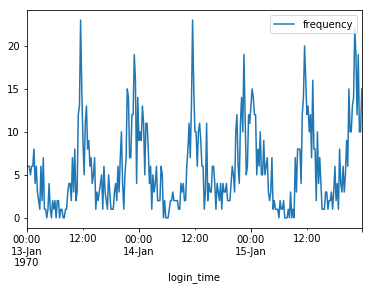

In [75]:
# For more clarification, lets plot from 13 to 15 from the weekdays

logins_agg.loc['1970-01-13' : '1970-01-15'].plot()

# like the trend of demand we have seen in weekends, ..
# ..the demand for weekdays is rising during both the noon as well as midnight

# Moving Average of Demand for February

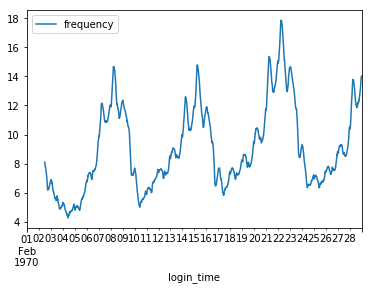

In [22]:
logins_agg.loc['1970-02'].rolling(96).mean().plot()

# Moving Average of Demand for March

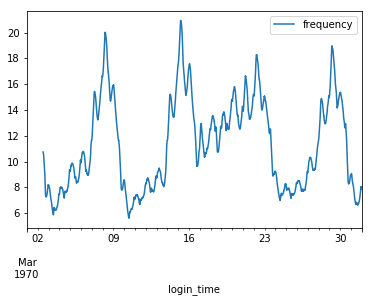

In [23]:
logins_agg.loc['1970-03'].rolling(144).mean().plot()

# Moving Average of Demand for April

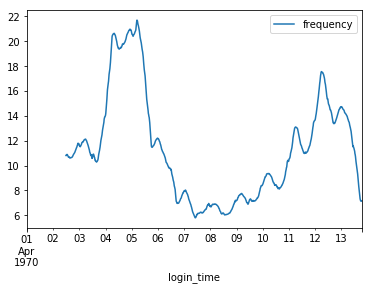

In [24]:
logins_agg.loc['1970-04'].rolling(144).mean().plot()

# Conclusions

### We have also checked the trend for all the rest three months and the trend was the same.

### -In sum, for all the four months there were a rise and fall in demand.
### -There were a gradual increase in demand from january to april.
### -April had the highest spike in demand.
### -Demand was higher during the weekends (Saturday and Sunday) than weekdays
### -Specificallly, the rise in demand was happening at around  midnight and noon during the weekends

### -There were also slight rise and falls in the weekdays, though it is not as significandt as that of weekends. The rise in the weekdays were happeining during the noon and midnight for all the four months inline with the trend in weekends.
